# DSCI 6001 4.1 Lab

## Plotting and Vector visualization

(this is a non-graded lab assignment)

In general, plotting simple geometry with vectors in most languages is an onerous task. The only language actually built to do this is TiKz for LaTeX, examples of which can be looked at [here](http://www.texample.net/tikz/examples/tag/3d/). As TiKz is a language and a craft all by itself, we will not cover it.

Many more high-quality math plots can be done with [MayaVi](http://code.enthought.com/projects/mayavi/) and [Plotly](https://plot.ly/). You can get free demos for these and are entreated to explore these for yourself.

Today you're going to practice some of your programming skills in conjunction with practicing a little linear algebra and visualization. We've provided you a class for plotting vectors and planes in matplotlib below. 

### First: Study the below code and understand it.
### Second: Modify the code as prescribed.


## TASK:

Below we have provided a piece of code that plots planes, using three demonstration planes and points on those planes (see your notes). **Write a class in python that can plot any plane given a set of at least three points.** You can build it to take more than three, if you choose but you'll need at least three (if you take more than three, what do you have to check for?) all lying on the plane. You will probably need to refresh yourself on [cross products](http://docs.scipy.org/doc/numpy/reference/generated/numpy.cross.html). 


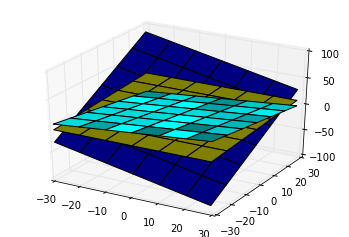

In [1]:
#A demonstration of creating planes
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

point1  = np.array([0,0,0])
normal1 = np.array([1,-2,1])

point2  = np.array([0,-4,0])
normal2 = np.array([0,2,-8])

point3  = np.array([0,0,1])
normal3 = np.array([-4,5,9])

# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d1 = -np.sum(point1*normal1)# dot product
d2 = -np.sum(point2*normal2)# dot product
d3 = -np.sum(point3*normal3)# dot product

# create x,y dimensions using a meshgrid (required for plt3d functions)
xx, yy = np.meshgrid(range(-30,30), range(-30,30))

# calculate corresponding z
z1 = (-normal1[0]*xx - normal1[1]*yy - d1)*1./normal1[2]
z2 = (-normal2[0]*xx - normal2[1]*yy - d2)*1./normal2[2]
z3 = (-normal3[0]*xx - normal3[1]*yy - d3)*1./normal3[2]

# plot the surface
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx,yy,z1, color='blue')
plt3d.plot_surface(xx,yy,z2, color='yellow')
plt3d.plot_surface(xx,yy,z3, color='cyan')
plt.show()



In [90]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class PlotThreePoints():
    def __init__(self, point1, point2, point3):
        self.point1 = point1
        self.point2 = point2
        self.point3 = point3
        
        # We should check that the three points are not in the same line or colinear.
        # Otherwise, the cross product will return an array with 0, and therefore,
        # those points cannot define a plane.
        
        # Defining 2 vectors from the 3 points:
        v = [point1[0]-point2[0],point1[1]-point2[1], point1[2]-point2[2]]
        w = [point2[0]-point3[0],point2[1]-point3[1], point2[2]-point3[2]]
        
        # Now, the cross product v and w, which will represent the normal to the plane defined
        # by the 3 initial points:
        v = np.asarray(v)
        w = np.asarray(w)
        
        # Checking if cosinus of the angle is 1 or -1: checking for colinearity of vectors:
        if (np.linalg.norm(v) * np.linalg.norm(w)) != v.dot(w):
        
            normal_to_plane = np.cross(v,w)
        
            # A plane is a*x+b*y+c*z+d=0
            # [a,b,c] is the normal. Thus, we have to calculate
            # d and we're set
            d = -np.sum(point1*normal_to_plane)# dot product
        
            # Create x,y dimensions using a meshgrid (required for plt3d functions).
            xx, yy = np.meshgrid(range(-30,30), range(-30,30))
            # Calculate corresponding z.
            if normal_to_plane[2] != 0:
                z = (-normal_to_plane[0]*xx - normal_to_plane[1]*yy - d)*1./normal_to_plane[2]
                
                # Plot the surface.
                plt3d = plt.figure().gca(projection='3d')
                plt3d.plot_surface(xx,yy,z, color='blue')
                plt.show()
            else:
                print("Z coordinate is 0. Cannot plot plane. Caused by normal to plane having 3rd element (Z) 0.")
            
        else:
            print("Points are in the same line. They cannot define a plane.")

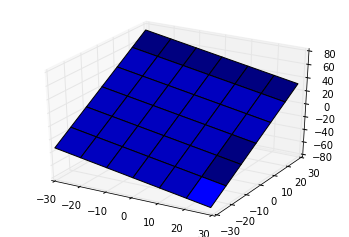

In [91]:
point1  = [1,2,3]
point2  = [3,5,7]
point3  = [5,3,2]
my_plot = PlotThreePoints(point1,point2,point3)

In [92]:
point1  = [0,0,0]
point2  = [0,-4,0]
point3  = [0,0,1]
my_plot = PlotThreePoints(point1,point2,point3)

Z coordinate is 0. Cannot plot plane. Caused by normal to plane having 3rd element (Z) 0.
